In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import multivariate_normal as mvn

In [2]:
# Model classes

# Naive Bayes - class
class GaussNB():
  def fit(self, X, y, epsilon=1e-3):

    self.likelihoods = dict ()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y == k, : ]

      self.likelihoods[k] = {'mean': X_k.mean(axis = 0), "cov": X_k.var(axis = 0) + epsilon}
      self.priors[k] = len(X-k)/len(X)


  def predict(self, X):

    N, D = X.shape

    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      # Bayes Theorem application
      P_hat[:, k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
    
    return P_hat.argmax(axis = 1)

# KNN class
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y.astype(int)

  def predict(self, X, k, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

# Gauss-Bayes class
class GaussBayes():

  def fit(self,X,y,epsilon=1e-3):

    self.likelihoods=dict()
    self.priors=dict()
    self.k = set(y.astype(int))

    for k in self.k:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon* np.identity(D)}
      self.priors[k] = len(X_k) / len(X)

  def predict(self,X):
    N,D = X.shape
    P_hat = np.zeros((N,len(self.k)))
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

# Accuracy method
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

# min-max normalization method
def min_max_scaling(X):
    new_X =[]
    for i in X:
      new_X.append((i - i.min())/(i.max() - i.min()))
    return np.asarray(new_X)


# Functions for getting and viewing instances
def view_digit(x):
    """ Displays the given instance
    NumpyArray: X -> A row vector with 784 values 
    """
    plt.imshow(x.reshape(28,28))

def get_mean(X, y, k):
    """ returns a row vector with the mean values for the given class
    NumpyArray: X -> An n by m matrix of instances
    NumpyArray: y -> A len(X) row vector of class labels 
    Int: K        -> The label in question 
    """
    return sum(X[y==k,:]/len(X[y==k,:]))

def view_mean(X, y, k):
    """ Displays the a mean representation of the given class in X
    NumpyArray: X -> An n by m matrix of instances
    NumpyArray: y -> A len(X) row vector of class labels 
    Int: K        -> The label in question 
    """
    view_digit(get_mean(X, y, k))

## Data Exploration
### Training data


In [3]:
# Convertion of the csv files into data frames.
path = '/content/drive/MyDrive/Enhance IT Data Science Course/Week 2/Assignment 2/Data/Mike Solis - MNIST_train.csv'
data_train = pd.read_csv(path)
path = '/content/drive/MyDrive/Enhance IT Data Science Course/Week 2/Assignment 2/Data/Mike Solis - MNIST_test.csv'
data_test = pd.read_csv(path)

In [4]:
data_train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Testing data

In [5]:
data_test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = data_train.to_numpy()

In [7]:
y_train = X_train[:, 2]

In [8]:
X_train = X_train[:, 3:]

In [9]:
X_train.shape

(60000, 784)

In [10]:
y_train.shape

(60000,)

In [11]:
X_test = data_test.to_numpy()

In [12]:
y_test = X_test[:, 2]

In [13]:
X_test = X_test[:, 3:]

In [14]:
X_test.shape

(10000, 784)

In [15]:
y_test.shape

(10000,)

## Naive Bayes

In [16]:
model_nb = GaussNB()

In [17]:
model_nb.fit(X_train, y_train)

In [18]:
y_pred_nb_train = model_nb.predict(X_train)

In [19]:
y_pred_nb_test = model_nb.predict(X_test)

In [20]:
acc_nb_train = accuracy(y_train, y_pred_nb_train)
acc_nb_train

0.5937666666666667

In [21]:
acc_nb_test = accuracy(y_test, y_pred_nb_test)
acc_nb_test

0.5878

Text(0.5, 42.0, 'Predicted label')

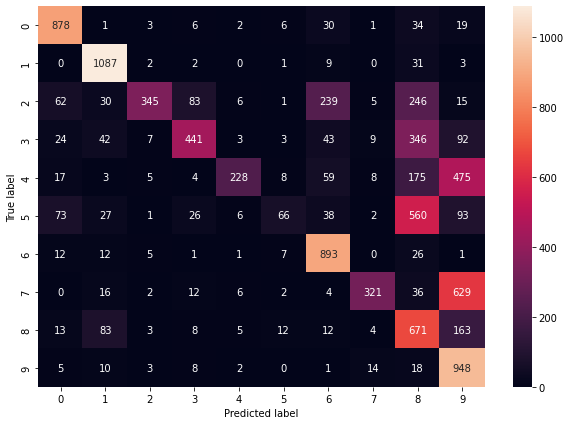

In [22]:
# Confusion matrix
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_nb_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Gauss-Bayes

In [23]:
model_gb = GaussBayes()

In [24]:
model_gb.fit(X_train, y_train)

In [25]:
y_pred_gb_train = model_gb.predict(X_train)

In [26]:
y_pred_gb_test = model_gb.predict(X_test)

In [27]:
acc_gb_train = accuracy(y_train, y_pred_gb_train)
acc_gb_train

0.11651666666666667

In [28]:
acc_gb_test = accuracy(y_test, y_pred_gb_test)
acc_gb_test

0.1093

Text(0.5, 42.0, 'Predicted label')

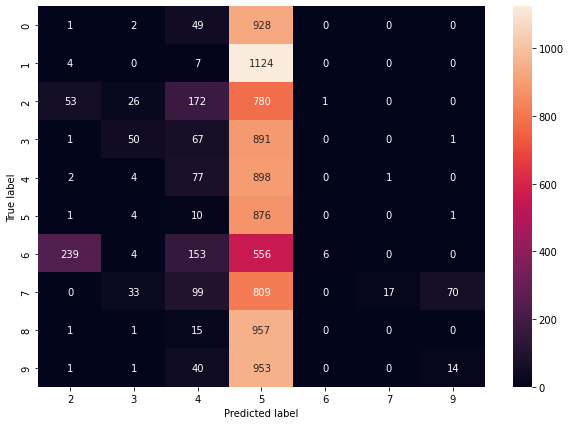

In [29]:
# Confusion matrix
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_gb_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##KNN

In [30]:
model_knn = KNNClassifier()

In [31]:
model_knn.fit(X_train, y_train)

In [32]:
y_pred_knn_train = model_knn.predict(X_train, 12)

In [33]:
y_pred_knn_test = model_knn.predict(X_test, 12)

In [34]:
acc_knn_train = 'Soon!'
acc_knn_test = 'Soon!'

In [35]:
acc_knn_train = accuracy(y_train, y_pred_knn_train)
acc_knn_train

1.0

In [36]:
acc_knn_test = accuracy(y_test, y_pred_knn_test)
acc_knn_test

0.9678

Text(0.5, 42.0, 'Predicted label')

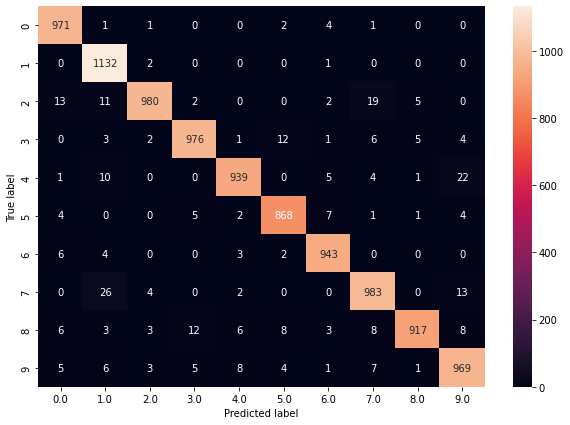

In [37]:
# Confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_knn_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Model comparison

In [38]:
table = [['Model', 'Train', 'Test'], 
         ['Naive Bayes', acc_nb_train, acc_nb_test], 
         ['Gauss-Bayes', acc_gb_train, acc_gb_test], 
         ['KNN', acc_knn_train, acc_knn_test]]

In [39]:
print(tabulate(table))

-----------  -------------------  ------
Model        Train                Test
Naive Bayes  0.5937666666666667   0.5878
Gauss-Bayes  0.11651666666666667  0.1093
KNN          1.0                  0.9678
-----------  -------------------  ------


##Data transormation - normalization

In [40]:
norm_X_train = min_max_scaling(X_train)
norm_X_test = min_max_scaling(X_test)

## Naive Bayes

In [41]:
model_nb = GaussNB()

In [42]:
model_nb.fit(norm_X_train, y_train)

In [43]:
y_pred_nb_train = model_nb.predict(norm_X_train)

In [44]:
y_pred_nb_test = model_nb.predict(norm_X_test)

In [45]:
acc_nb_train= accuracy(y_train, y_pred_nb_train)
acc_nb_train

0.7682333333333333

In [46]:
acc_nb_test= accuracy(y_test, y_pred_nb_test)
acc_nb_test

0.7746

Text(0.5, 42.0, 'Predicted label')

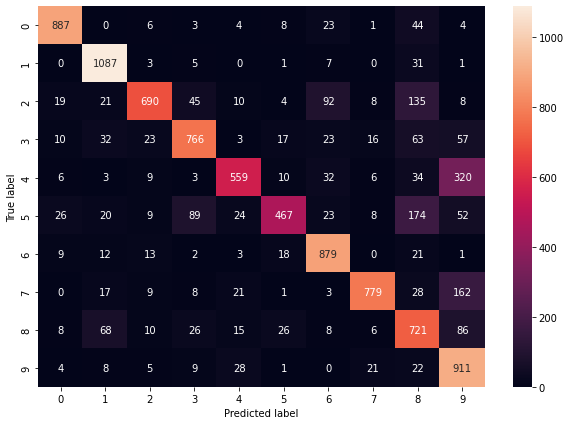

In [47]:
# Confusion matrix
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_nb_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Gauss-Bayes

In [48]:
model_gb = GaussBayes()

In [49]:
model_gb.fit(norm_X_train, y_train)

In [50]:
y_pred_gb_train = model_gb.predict(norm_X_train)

In [51]:
y_pred_gb_test = model_gb.predict(norm_X_test)

In [52]:
acc_gb_train = accuracy(y_train, y_pred_gb_train)
acc_gb_train

0.8657333333333334

In [53]:
acc_gb_test = accuracy(y_test, y_pred_gb_test)
acc_gb_test

0.8395

Text(0.5, 42.0, 'Predicted label')

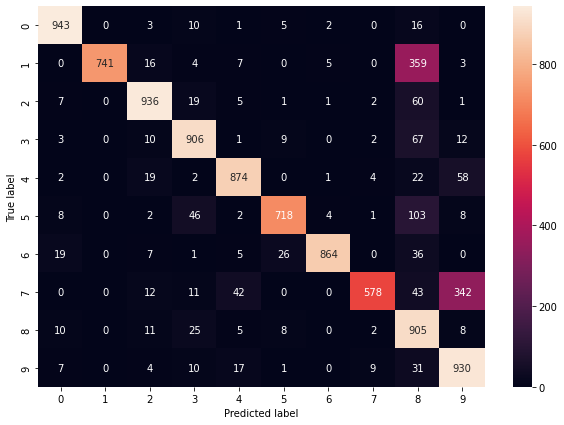

In [54]:
# Confusion matrix
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_gb_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##KNN

In [55]:
model_knn = KNNClassifier()

In [56]:
model_knn.fit(norm_X_train, y_train)

In [57]:
y_pred_knn_train = model_knn.predict(norm_X_train, 12)

In [58]:
y_pred_knn_test = model_knn.predict(norm_X_test, 12)

In [59]:
acc_knn_train = 'Soon!'
acc_knn_test = 'Soon!'

In [60]:
acc_knn_train = accuracy(y_train, y_pred_knn_train)
acc_knn_train

1.0

In [61]:
acc_knn_test = accuracy(y_test, y_pred_knn_test)
acc_knn_test

0.9678

Text(0.5, 42.0, 'Predicted label')

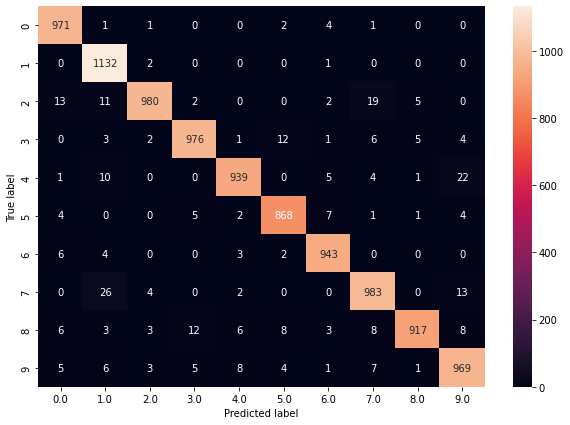

In [62]:
# Confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_knn_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')


#Model comparison

In [63]:
table = [['Model', 'Train', 'Test'], 
         ['Naive Bayes', acc_nb_train, acc_nb_test], 
         ['Gauss-Bayes', acc_gb_train, acc_gb_test], 
         ['KNN', acc_knn_train, acc_knn_test]]

In [64]:
print(tabulate(table))

-----------  ------------------  ------
Model        Train               Test
Naive Bayes  0.7682333333333333  0.7746
Gauss-Bayes  0.8657333333333334  0.8395
KNN          1.0                 0.9678
-----------  ------------------  ------
